In [22]:
%pip install pandas numpy sklearn torch torhvision matplotlib seaborn

ERROR: Could not find a version that satisfies the requirement torhvision (from versions: none)
ERROR: No matching distribution found for torhvision


In [23]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [24]:
training_data = datasets.MNIST(
    train=True,
    root='data',
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    train=False,
    root='data',
    transform=ToTensor(),
    download=True
)

In [25]:
training_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [26]:
training_data.targets.size()

torch.Size([60000])

In [27]:
training_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [28]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(training_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}

loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x18ea0c5d850>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x18ea0c5d970>}

In [29]:
# creating the NN
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [30]:
class MyCNN(nn.Module):

    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x  = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)) ,2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)


In [31]:
device = 'cpu'

model = MyCNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

In [32]:
def train(epoch):
    model.train()
    for batch_index, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_index % 20 == 0:
            print(f'Train epoch : {epoch} ')

In [37]:
import torch

def test():

    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        
    test_loss /= len(loaders['test'].dataset)
    print(test_loss)

In [38]:
for epoch in range(1, 11):
    train(epoch=epoch)
    test()

<ipython-input-30-510cb736b81f>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
Train epoch : 1 
0.015078006529808044
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoch : 2 
Train epoc

In [44]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[1]
data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Predicition : {prediction}')

Predicition : 2


<ipython-input-30-510cb736b81f>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


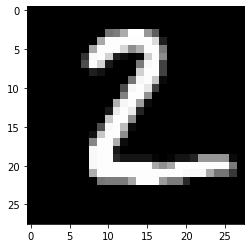

In [45]:
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()